In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
dpa = pd.read_csv("C:\\Users\\zisan\\Downloads\\Exploratory projects\\Bolt\\Driver-Performance-Analytics\\driver_performance_data.csv")

In [31]:
dpa.head(5)

,ride_id,driver_id,driver_experience,ride_duration_min,ride_distance_km,driver_rating,fraud_flag,fraud_reason,ride_timestamp,surge_pricing,ride_cancellation,payment_status,average_wait_time_min,city,weather_condition
0,RIDE_0,DRIVER_82,7,11,7.763554,3.753097,True,Drop-off to Unknown place,2024-10-08 21:58:10.824723,False,False,Success,26.456813,Tallinn,Foggy
1,RIDE_1,DRIVER_15,20,22,5.133749,1.562212,True,Drop-off to Unknown place,2024-08-06 21:58:10.824735,False,False,Success,41.099040,Valga,Cloudy
2,RIDE_2,DRIVER_4,15,31,9.552989,2.942359,True,Drop-off to Unknown place,2024-12-31 21:58:10.824738,False,True,Success,25.380368,Saaremaa,Cloudy
3,RIDE_3,DRIVER_95,11,38,3.598432,1.110147,True,Overcharged,2024-01-11 21:58:10.824739,False,True,Success,8.677933,Rapla,Foggy
4,RIDE_4,DRIVER_36,8,31,16.872747,3.021820,False,NaN,2024-04-09 21:58:10.824742,True,False,Paid,17.662948,Keila,Cloudy


In [32]:
dpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ride_id                1000 non-null   object 
 1   driver_id              1000 non-null   object 
 2   driver_experience      1000 non-null   int64  
 3   ride_duration_min      1000 non-null   int64  
 4   ride_distance_km       1000 non-null   float64
 5   driver_rating          1000 non-null   float64
 6   fraud_flag             1000 non-null   bool   
 7   fraud_reason           487 non-null    object 
 8   ride_timestamp         1000 non-null   object 
 9   surge_pricing          1000 non-null   bool   
 10  ride_cancellation      1000 non-null   bool   
 11  payment_status         1000 non-null   object 
 12  average_wait_time_min  1000 non-null   float64
 13  city                   1000 non-null   object 
 14  weather_condition      1000 non-null   object 
dtypes: bo

In [33]:
dpa.describe()

,driver_experience,ride_duration_min,ride_distance_km,driver_rating,average_wait_time_min
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.136000,32.259000,15.957710,2.994295,23.059517
std,5.895953,15.590927,8.035797,1.160066,12.662248
min,1.000000,5.000000,2.043823,1.000047,1.010604
25%,5.000000,19.000000,9.107910,2.003897,12.044649
50%,10.000000,33.000000,16.220815,3.001028,22.832625
75%,15.000000,45.250000,22.646535,4.000873,34.527897
max,20.000000,59.000000,29.983584,4.995570,44.965121


In [34]:
dpa.columns

Index(['ride_id', 'driver_id', 'driver_experience', 'ride_duration_min',
       'ride_distance_km', 'driver_rating', 'fraud_flag', 'fraud_reason',
       'ride_timestamp', 'surge_pricing', 'ride_cancellation',
       'payment_status', 'average_wait_time_min', 'city', 'weather_condition'],
      dtype='object')

In [35]:
dpa.isna().sum()

ride_id                    0
driver_id                  0
driver_experience          0
ride_duration_min          0
ride_distance_km           0
driver_rating              0
fraud_flag                 0
fraud_reason             513
ride_timestamp             0
surge_pricing              0
ride_cancellation          0
payment_status             0
average_wait_time_min      0
city                       0
weather_condition          0
dtype: int64

In [36]:
dpa.duplicated().sum()

np.int64(0)

In [ ]:
# Ride Duration by City

In [47]:
duration_by_city = dpa.groupby("city")["ride_duration_min"].mean().sort_values( ascending = False)

In [48]:
duration_by_city

city
Parnu       34.500000
Saaremaa    33.430233
Tapa        33.205128
Tartu       33.073171
Keila       32.943820
Narva       32.773196
Elva        32.530864
Valga       31.872340
Tallinn     31.377049
Rapla       30.093750
Voru        29.945055
Name: ride_duration_min, dtype: float64

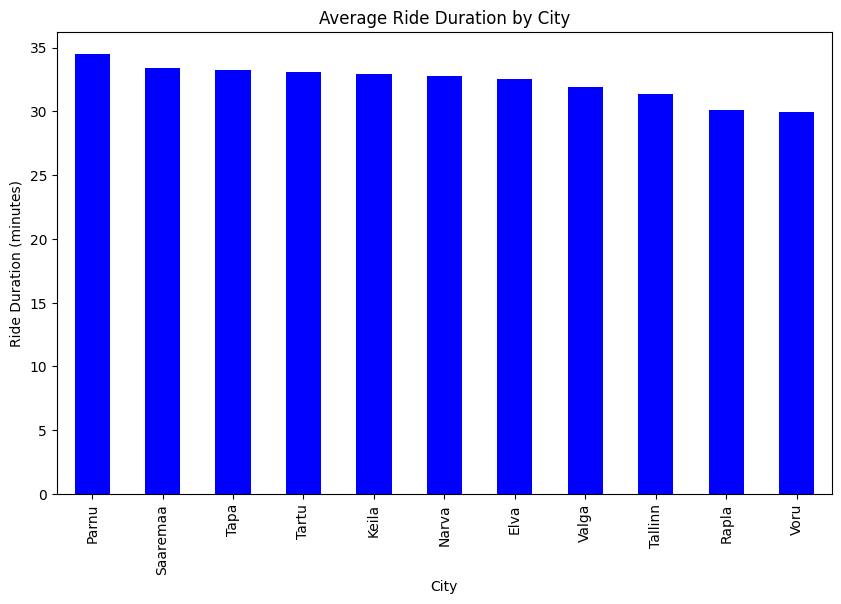

In [49]:
duration_by_city.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Average Ride Duration by City')
plt.xlabel('City')
plt.ylabel('Ride Duration (minutes)')
plt.show()

In [ ]:
# Weather Impact on Driver Ratings

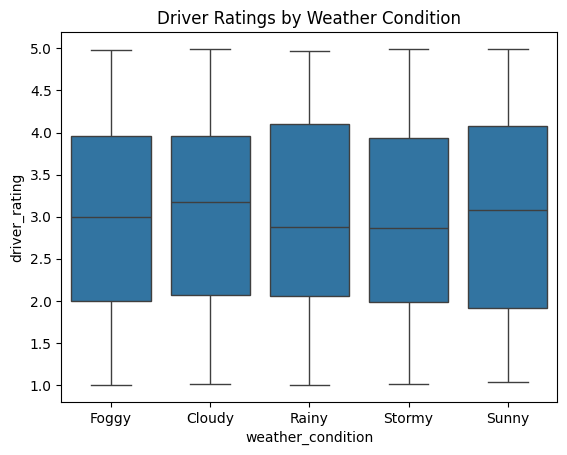

In [51]:
sns.boxplot(data=dpa, x='weather_condition', y='driver_rating')
plt.title('Driver Ratings by Weather Condition')
plt.show()

In [ ]:
#  Failed Payments by City

In [54]:
failed_payments = dpa[dpa["payment_status"] != "Success"]
failed_by_city = failed_payments["city"].sort_values(ascending = False)

In [57]:
failed_by_city.head()

889    Voru
770    Voru
320    Voru
441    Voru
438    Voru
Name: city, dtype: object

In [ ]:
# Average Wait Time by City

In [59]:
wait_time_by_city = dpa.groupby('city')['average_wait_time_min'].mean().sort_values( ascending = False)

In [60]:
wait_time_by_city.head()

city
Parnu       25.785611
Valga       25.606601
Saaremaa    23.921336
Tallinn     23.510642
Voru        23.075770
Name: average_wait_time_min, dtype: float64

In [ ]:
# Frequent Ride Cancellations

In [62]:
cancellation_by_driver = dpa.groupby('driver_id')['ride_cancellation'].sum().sort_values(ascending=False)

In [63]:
cancellation_by_driver.head()

driver_id
DRIVER_32    14
DRIVER_59    11
DRIVER_29    10
DRIVER_36     9
DRIVER_70     9
Name: ride_cancellation, dtype: int64

In [ ]:
# Correlation Between Driver Rating and Experience

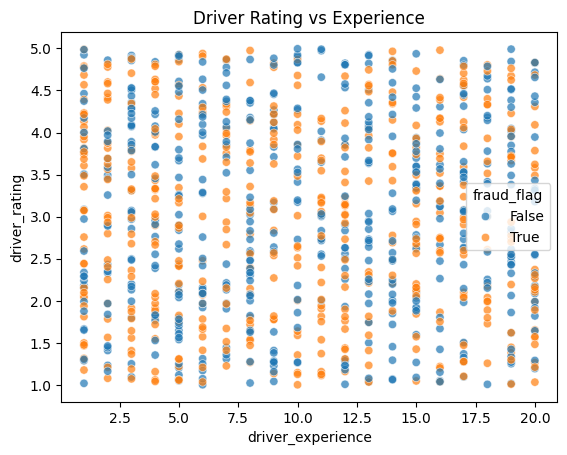

In [64]:
sns.scatterplot(data=dpa, x='driver_experience', y='driver_rating', hue='fraud_flag', alpha=0.7)
plt.title("Driver Rating vs Experience")
plt.show()

In [ ]:
# Average wait time by payment status

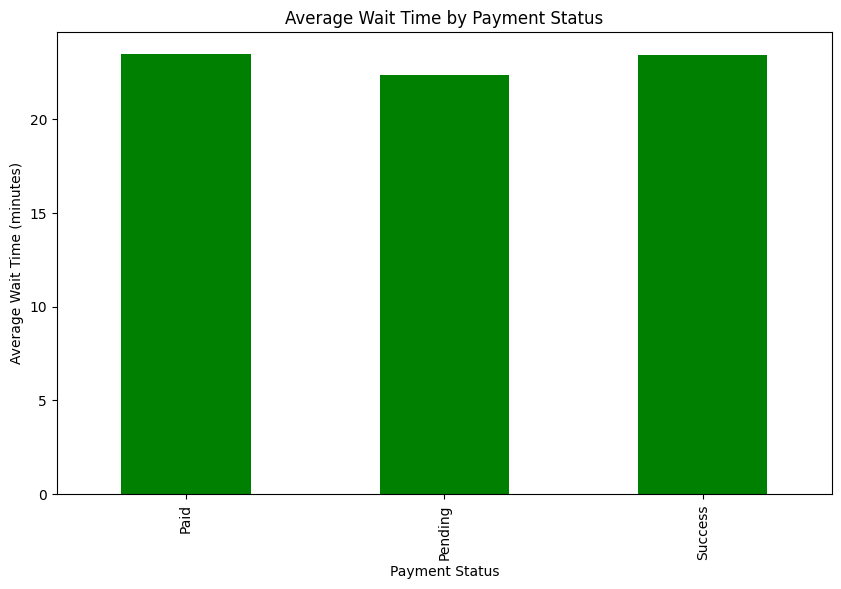

In [65]:
wait_time_by_payment = dpa.groupby('payment_status')['average_wait_time_min'].mean()
wait_time_by_payment.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Average Wait Time by Payment Status')
plt.xlabel('Payment Status')
plt.ylabel('Average Wait Time (minutes)')
plt.show()

In [ ]:
# Fraud flag distribution by city

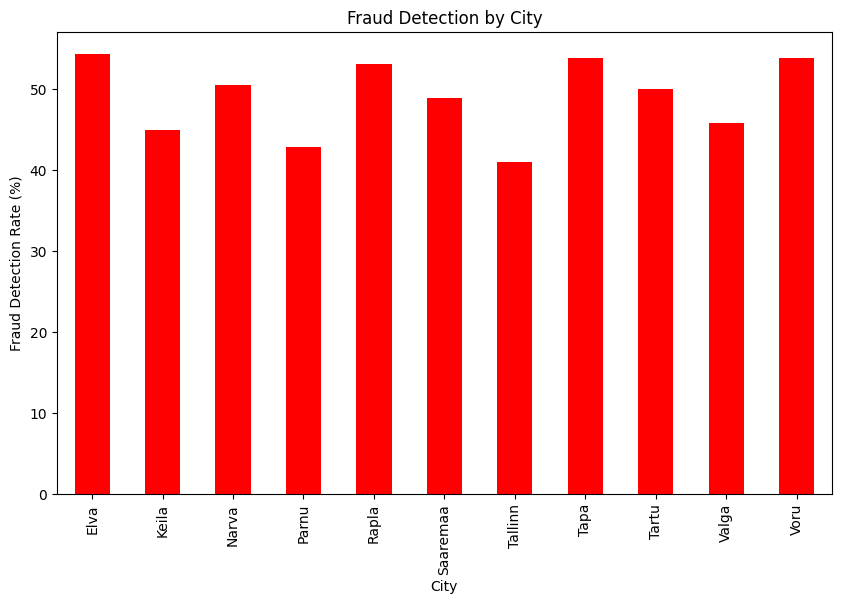

In [67]:

fraud_by_city = dpa.groupby('city')['fraud_flag'].mean() * 100
fraud_by_city.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Fraud Detection by City')
plt.xlabel('City')
plt.ylabel('Fraud Detection Rate (%)')
plt.show()
